# Perceptron Model with Iris Dataset


This notebook to train on how to build and train a Perceptron model using the Iris dataset. The Iris dataset is a classic dataset used in machine learning and statistics, consisting of 150 samples of iris flowers with four features each (sepal length, sepal width, petal length, and petal width) and three classes (Iris-setosa, Iris-versicolor, and Iris-virginica).

In this notebook, we will do the following:
* Load and prepare the Iris dataset.
* Split the dataset into training and testing sets.
* Standardize the features.
* Train a Perceptron model.
* Evaluate the model's performance.


# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


# EDA

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

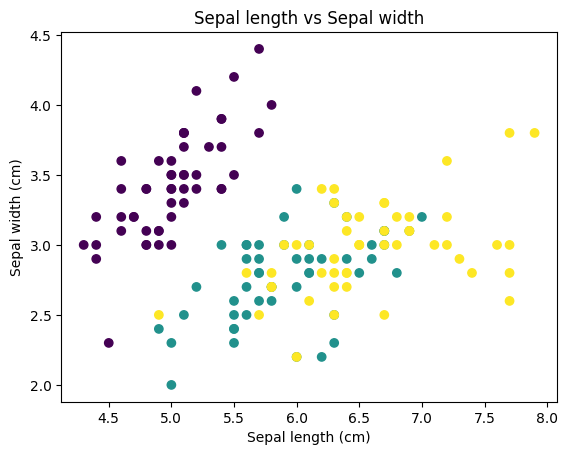

In [6]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'])
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Sepal length vs Sepal width')
plt.show()

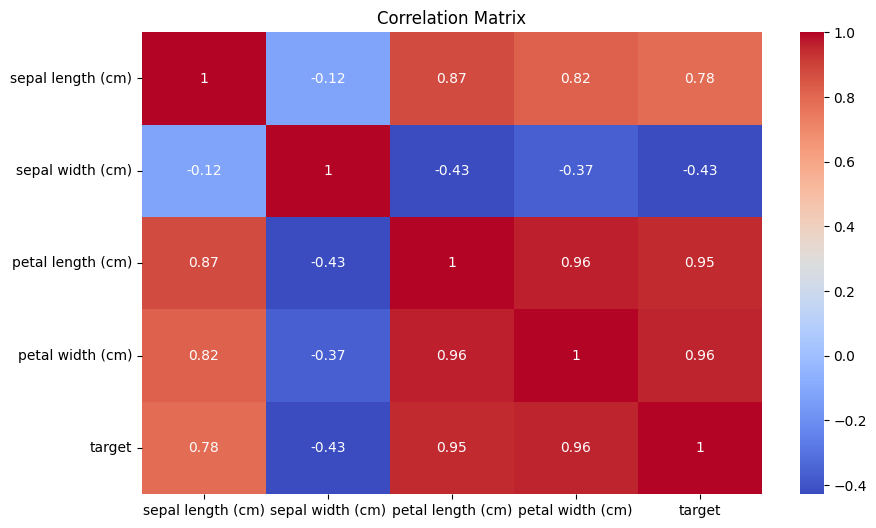

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Split the dataset into training and testing sets

In [8]:
X = df.iloc[:, :-1].values
y = df['target'].values


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features

In [10]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Initialize and train the Perceptron model

In [11]:
#Initialize
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=42)

In [12]:
#Train
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=42)

# Predict the labels of the test set

In [13]:
y_pred = ppn.predict(X_test_std)

# Calculate the accuracy of the model

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


# Display the first few predictions

In [15]:
print('First few predictions:', y_pred[:10])
print('True labels:', y_test[:10])

First few predictions: [1 0 2 1 1 0 0 2 1 1]
True labels: [1 0 2 1 1 0 1 2 1 1]
